In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import statistics
from scipy.optimize import curve_fit
import math 
from scipy.stats import binom
import seaborn as sns
from scipy import stats

from scipy.stats import beta

In [4]:
#df = pd.read_csv (r'/home/emonroe/Downloads/20210531_toEM/behavior_csv/senor_clean_contingencies_only_parsed_data.csv')

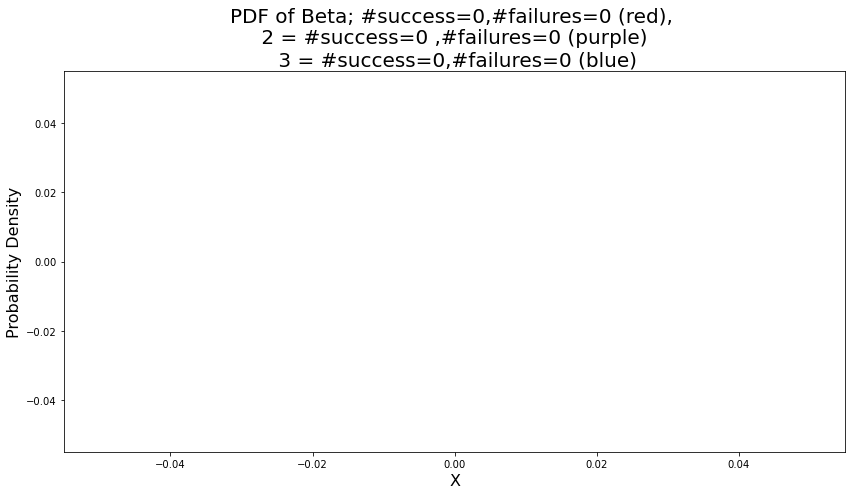

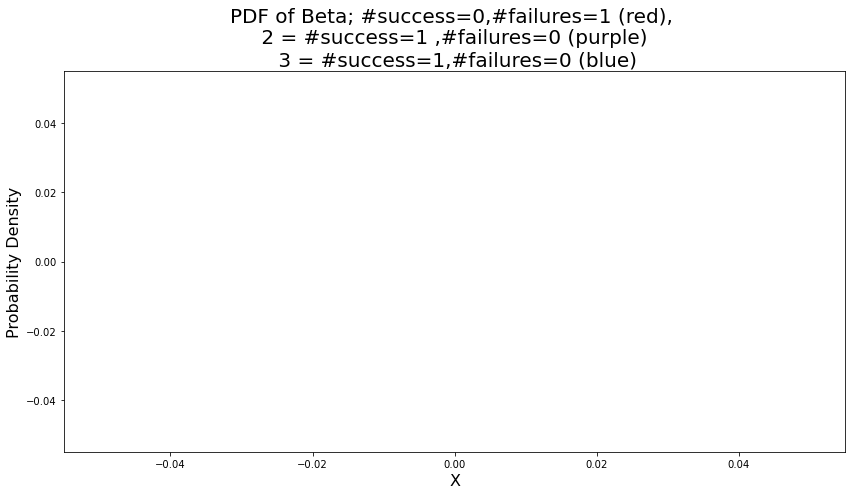

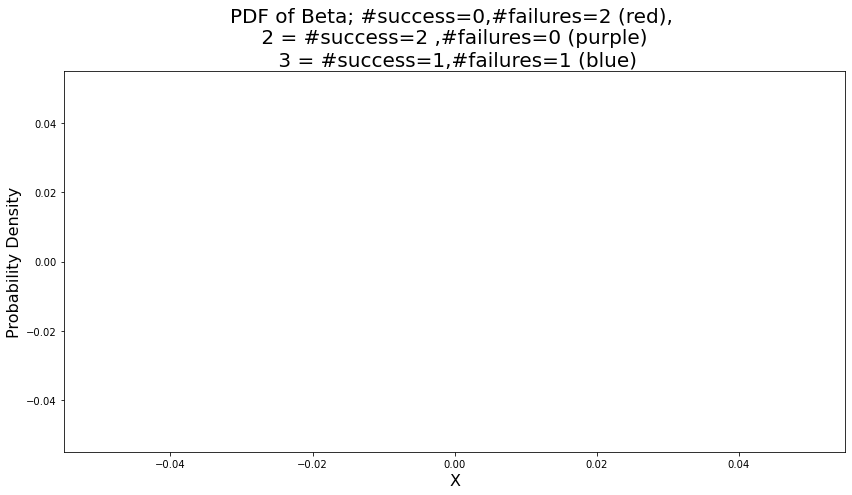

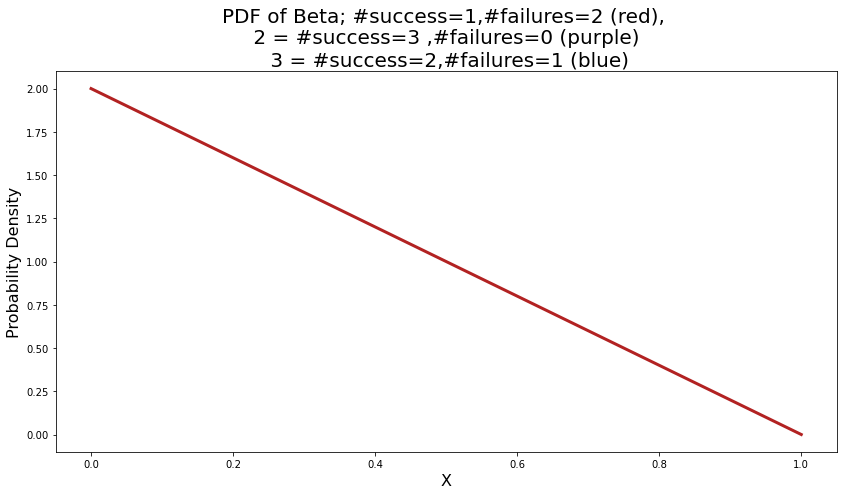

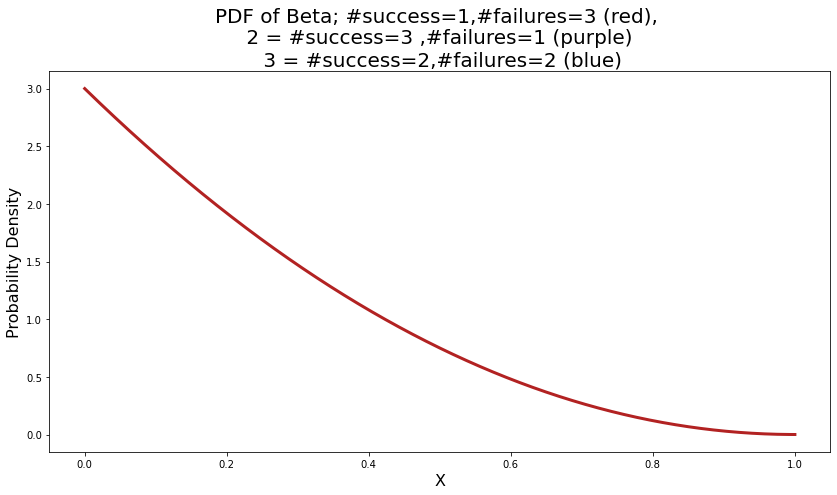

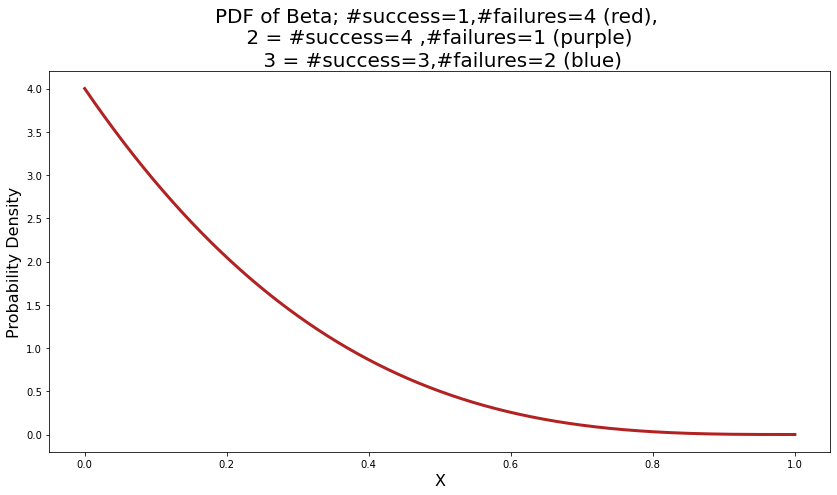

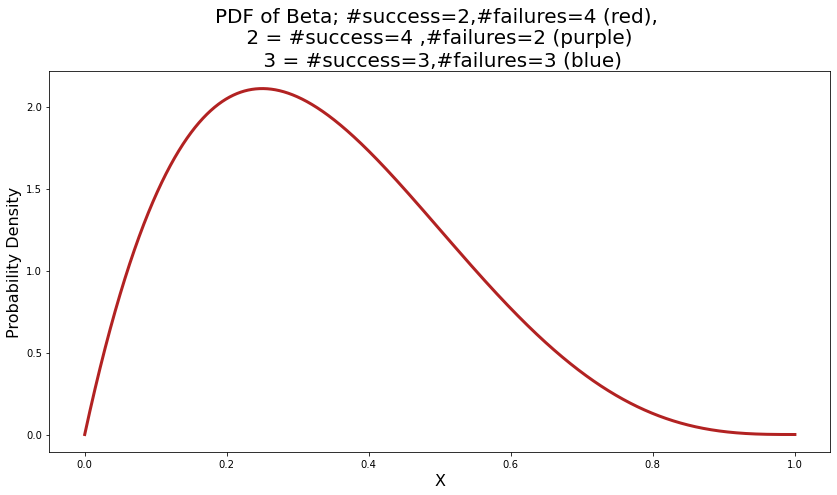

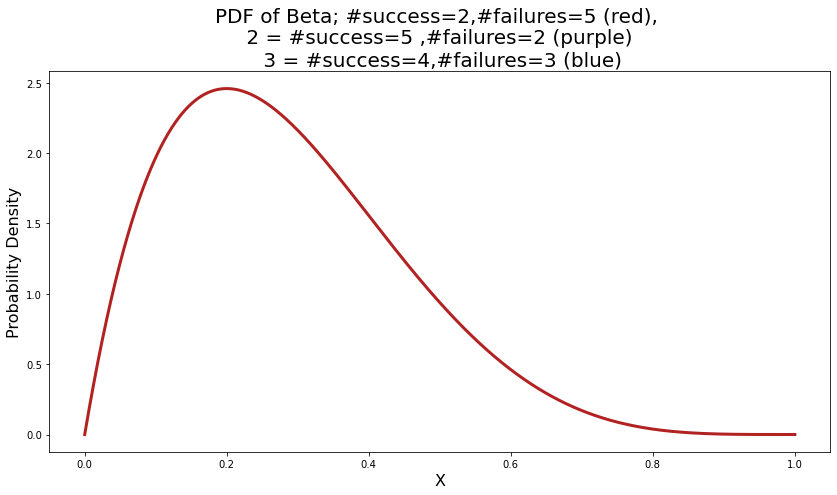

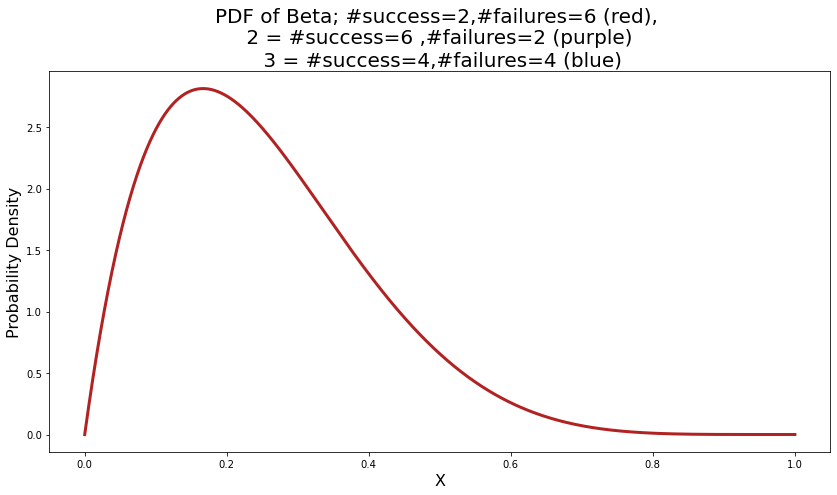

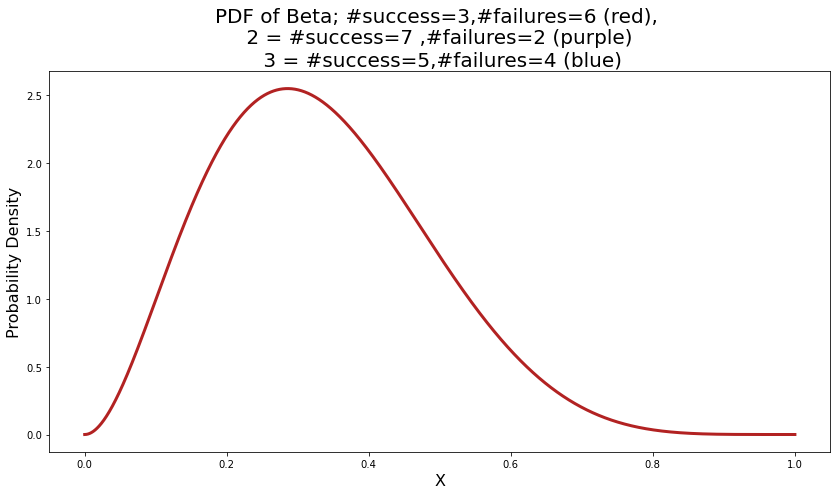

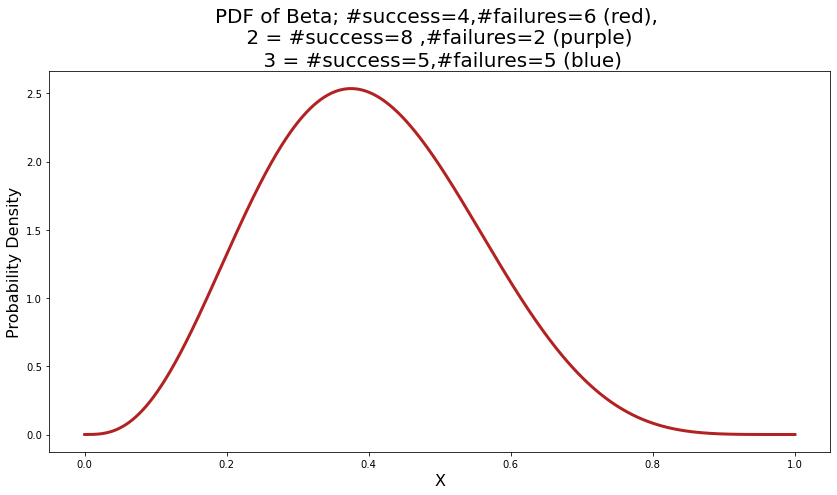

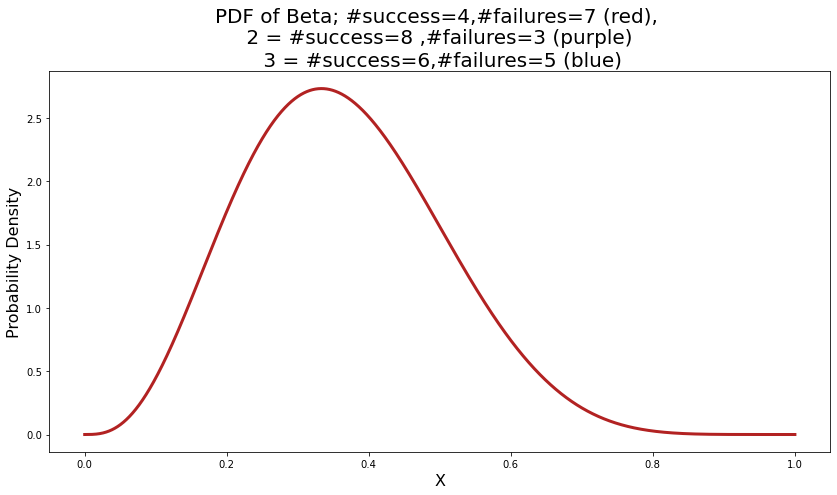

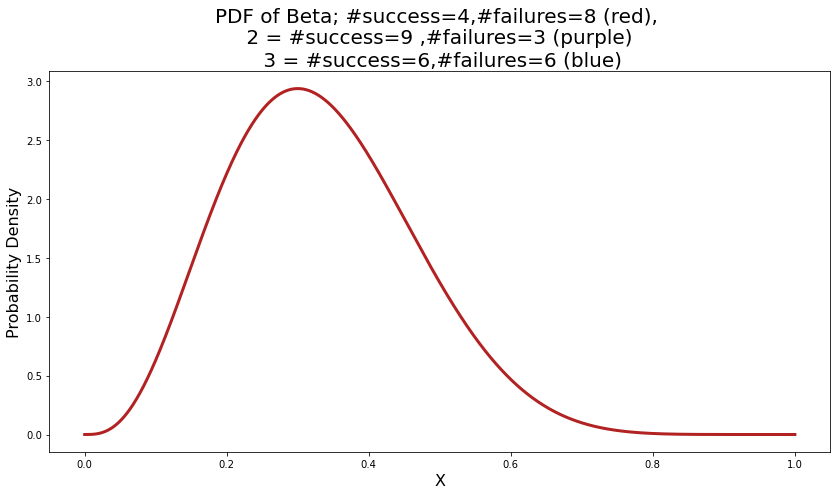

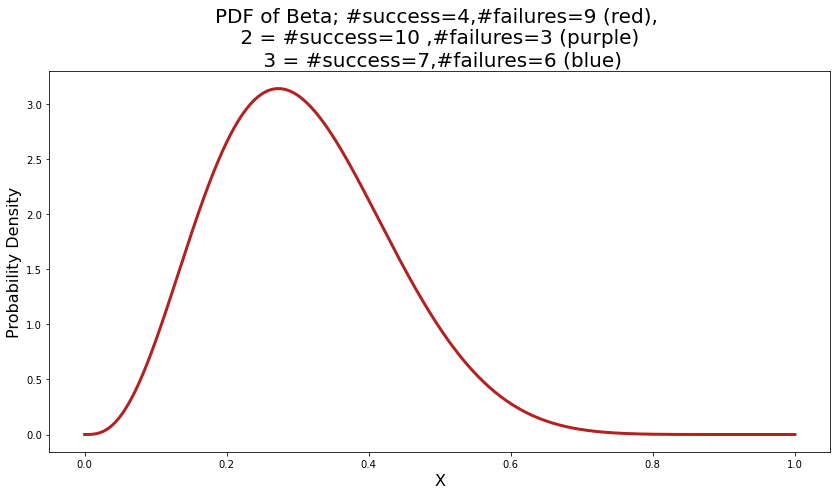

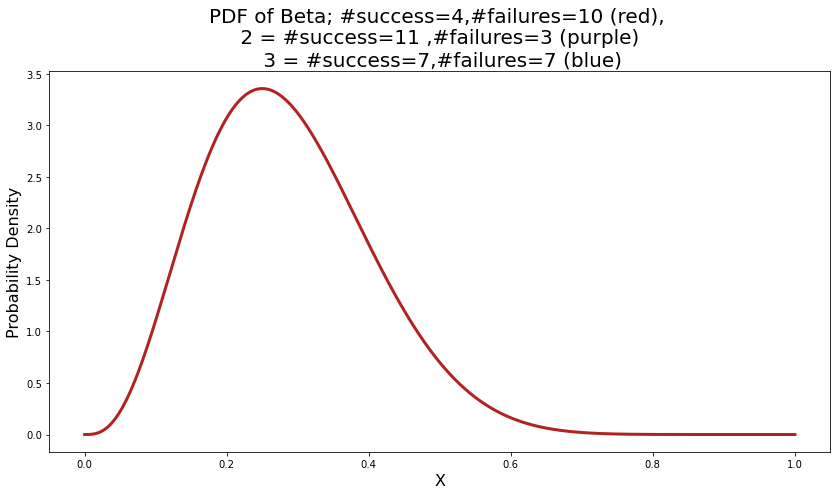

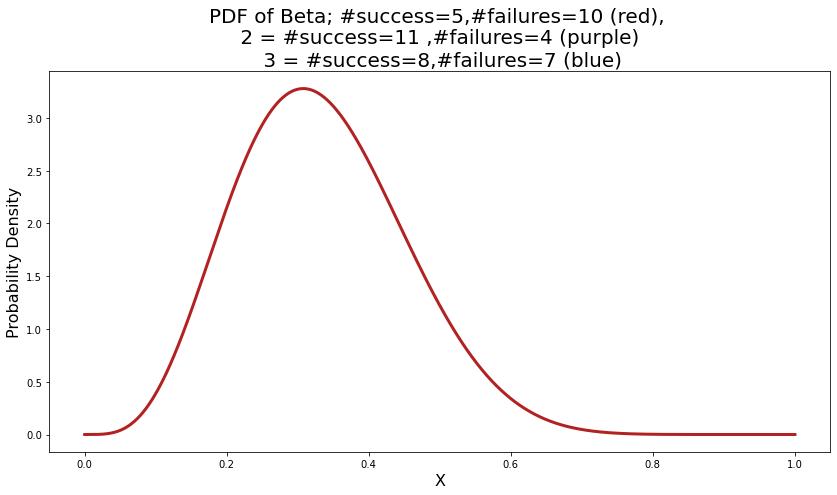

In [5]:
pretend = [0,0,1,0,0,1,0,0,1,1,0,0,0,0,1,0]
pretend2 = [1,1,1,0,1,0,1,1,1,1,0,1,1,1,0,1]
pretend4 = [1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0]
for ix in range(len(pretend)):
    pretend1=pretend[0:ix]
    pretend3 = pretend2[0:ix]
    pretend5 = pretend4[0:ix]
    num_s=sum(pretend1)
    num_s2=sum(pretend3)
    num_f =len(pretend1)-num_s
    num_f2 =len(pretend3)-num_s2
    num_s3=sum(pretend5)
    num_f3 =len(pretend5)-num_s3
    fig, ax = plt.subplots(figsize=(14,7))
    #plt.rcParams['figure.figsize'] = [10, 7]
    x = np.linspace(0, 1, 10000)
    y1 = beta.pdf(x, num_s, num_f)
    y2 = beta.pdf(x, num_s2, num_f2)
    y3 = beta.pdf(x, num_s3, num_f3)
    ax.set_title(f"PDF of Beta; #success={num_s},#failures={num_f} (red), \n 2 = #success={num_s2} ,#failures={num_f2} (purple) \n 3 = #success={num_s3},#failures={num_f3} (blue)", fontsize=20)
    ax.set_xlabel("X", fontsize=16)
    ax.set_ylabel("Probability Density", fontsize=16)
    ax.plot(x, y1, linewidth=3, color='firebrick')
#     ax.plot(x, y2, linewidth=3, color='purple')
#     ax.plot(x, y3, linewidth=3, color='blue')
    
    #plt.annotate(f"Beta(1:{num_s},{num_f})", xy=(0.15, 3.7), size = 14, ha='center', va='center', color='firebrick')


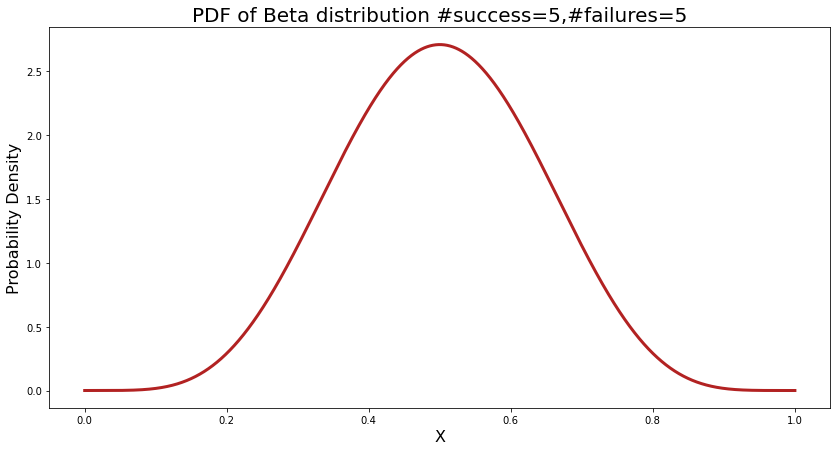

In [19]:
pretend = [1,1,1,1,1,0,0,0,0,0]

num_s=sum(pretend)
#     num_s2=sum(pretend3)
num_f =len(pretend)-num_s

#     num_f2 =len(pretend3)-num_s2
#     num_s3=sum(pretend5)
#     num_f3 =len(pretend5)-num_s3
fig, ax = plt.subplots(figsize=(14,7))
    #plt.rcParams['figure.figsize'] = [10, 7]
x = np.linspace(0, 1, 10000)
y1 = beta.pdf(x, num_s+1, num_f+1)
#     y2 = beta.pdf(x, num_s2, num_f2)
#     y3 = beta.pdf(x, num_s3, num_f3)
ax.set_title(f"PDF of Beta distribution #success={num_s},#failures={num_f}",fontsize=20) #(red), \n 2 = #success={num_s2} ,#failures={num_f2} (purple) \n 3 = #success={num_s3},#failures={num_f3} (blue)", fontsize=20)
ax.set_xlabel("X", fontsize=16)
ax.set_ylabel("Probability Density", fontsize=16)
ax.plot(x, y1, linewidth=3, color='firebrick')
#     ax.plot(x, y2, linewidth=3, color='purple')
#     ax.plot(x, y3, linewidth=3, color='blue')
    
    #plt.annotate(f"Beta(1:{num_s},{num_f})", xy=(0.15, 3.7), size = 14, ha='center', va='center', color='firebrick')



In [21]:
#next goal will be to use rat data. 
#questions 
#how to handle cases when rat gets no reward or only reward for first trials? 
#similarly, need to figure out what to do on only first trial (lollipop at 0/1?)
# need to figure out what increasing y values really mean, how impacted by number of samples? (5,5 vs 6,6)
    #how sure you can be... 2/7 success vs 2/8(higher)
#is there a better dsitrubtion to model the first few samples? 
#should I do this trial by trial or bout by bout? 
#gotta be someway to use the integral/probability to predict rat choices, and overlap to model uncertainty?


In [23]:
df[1:10]

,Unnamed: 0,leaf,stem,reward,contingency,date,session,trial
1,1,1,A,0,805020202050,20201028,1,1
2,2,2,A,0,805020202050,20201028,1,2
3,3,3,B,1,805020202050,20201028,1,3
4,4,4,B,0,805020202050,20201028,1,4
5,5,5,C,0,805020202050,20201028,1,5
6,6,6,C,1,805020202050,20201028,1,6
7,7,1,A,1,805020202050,20201028,1,7
8,8,2,A,1,805020202050,20201028,1,8
9,9,3,B,0,805020202050,20201028,1,9


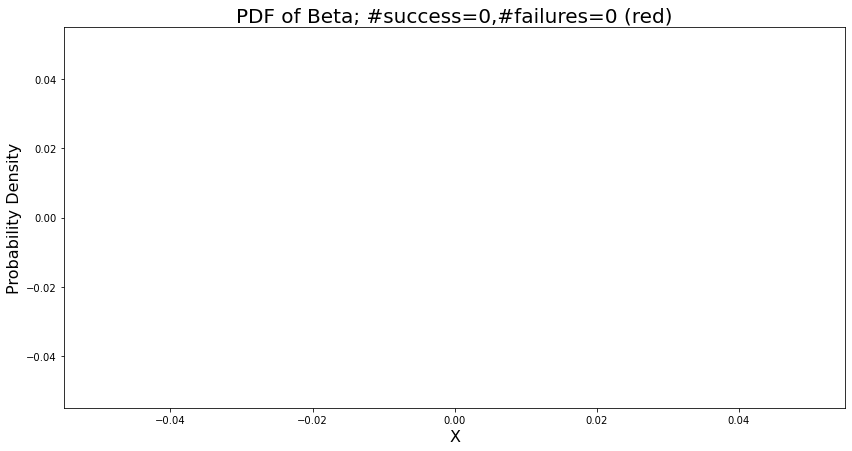

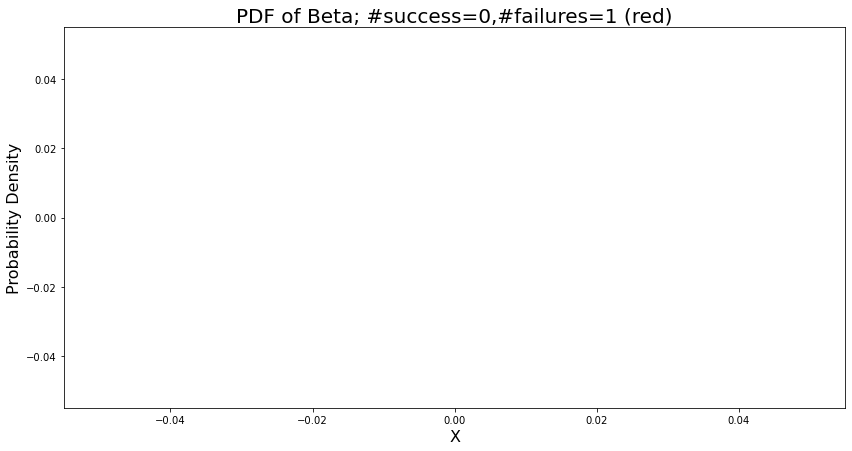

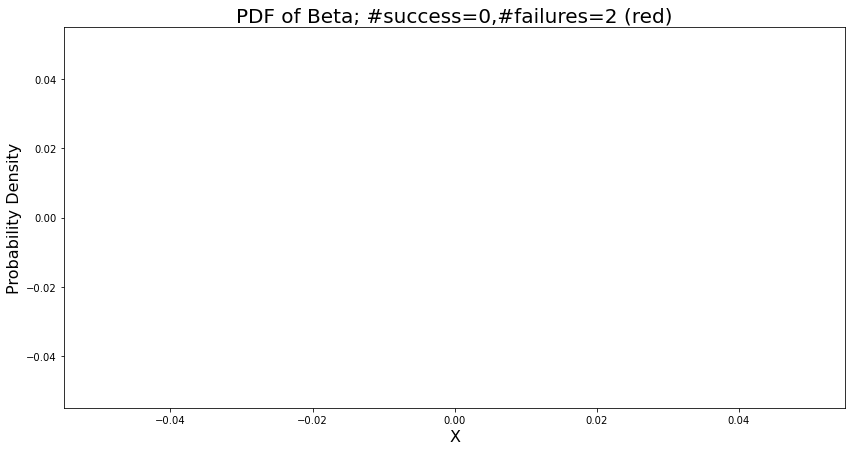

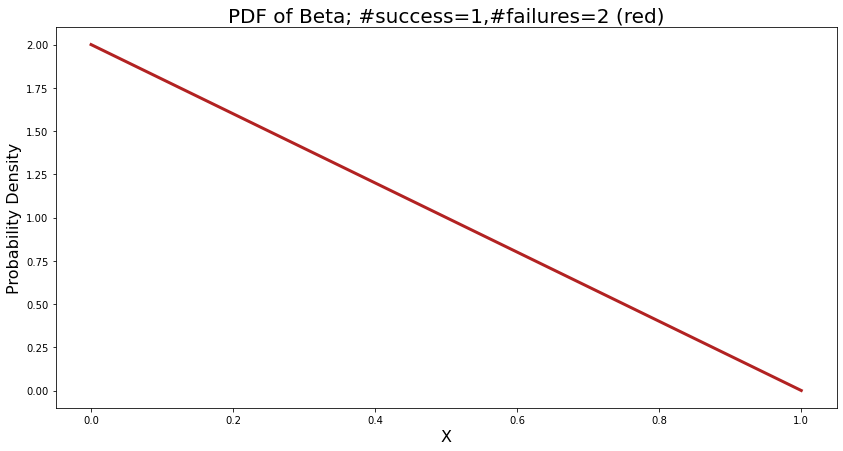

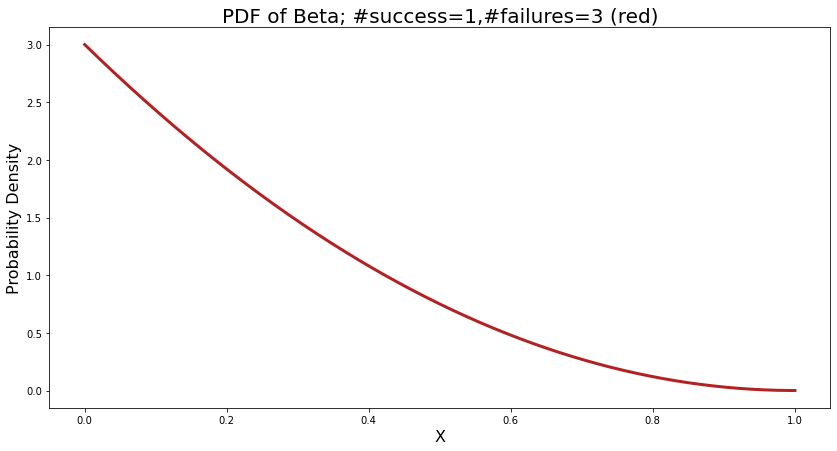

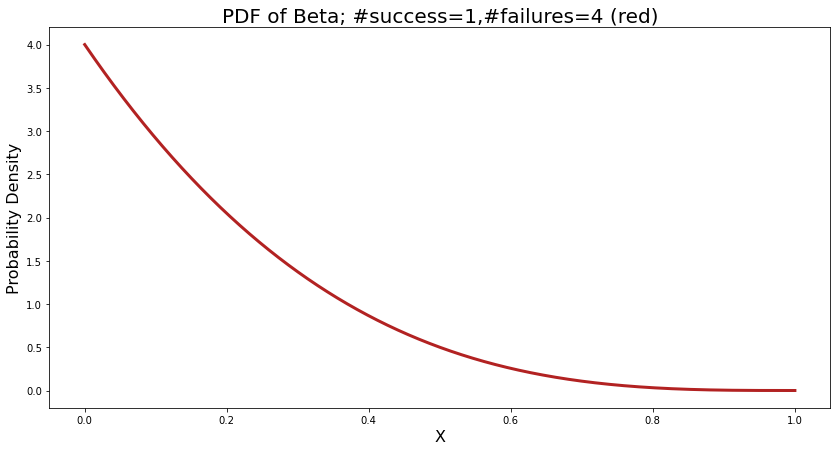

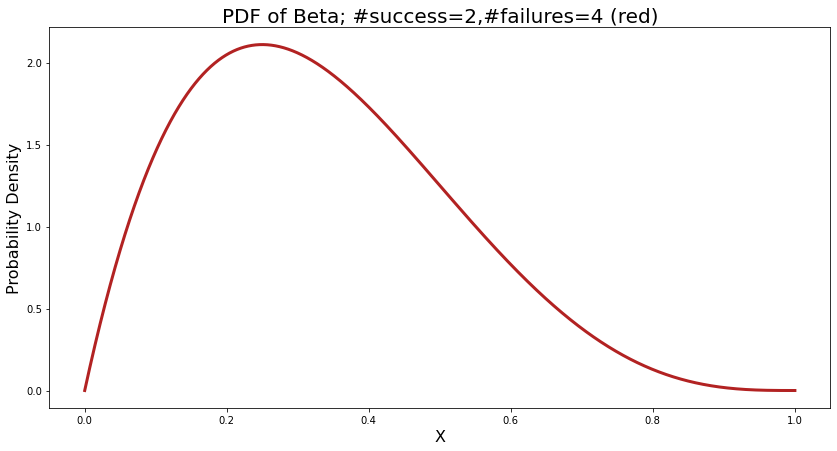

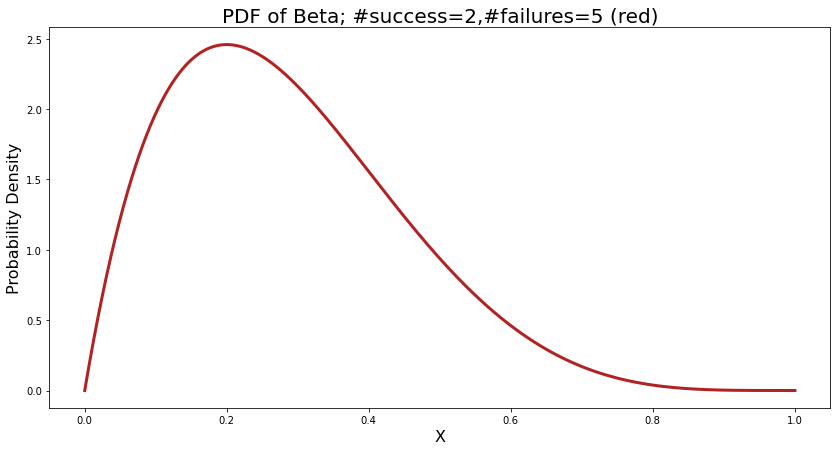

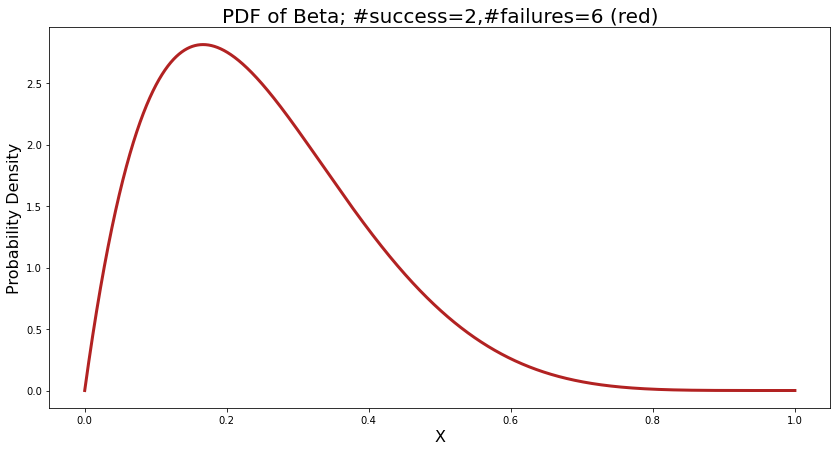

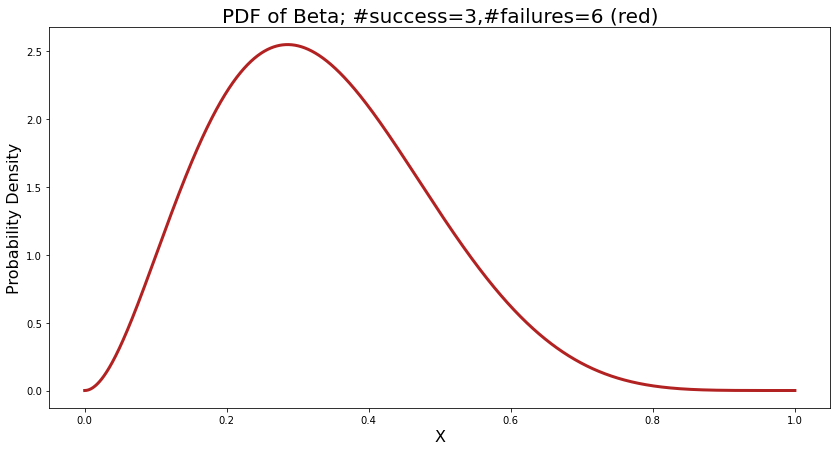

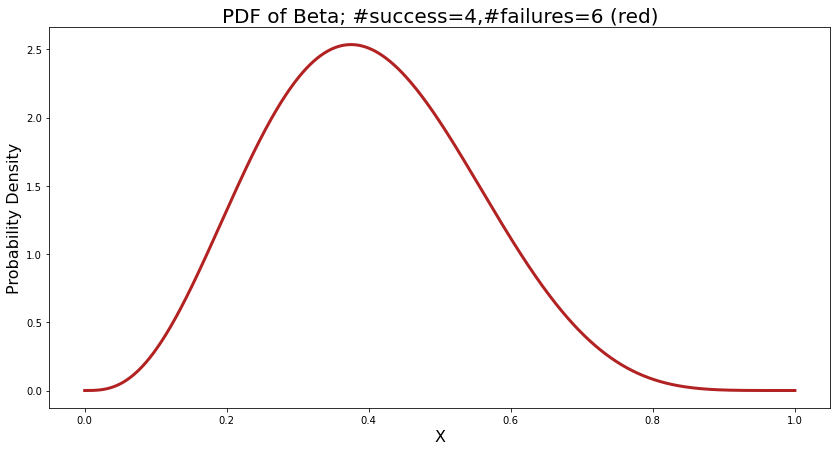

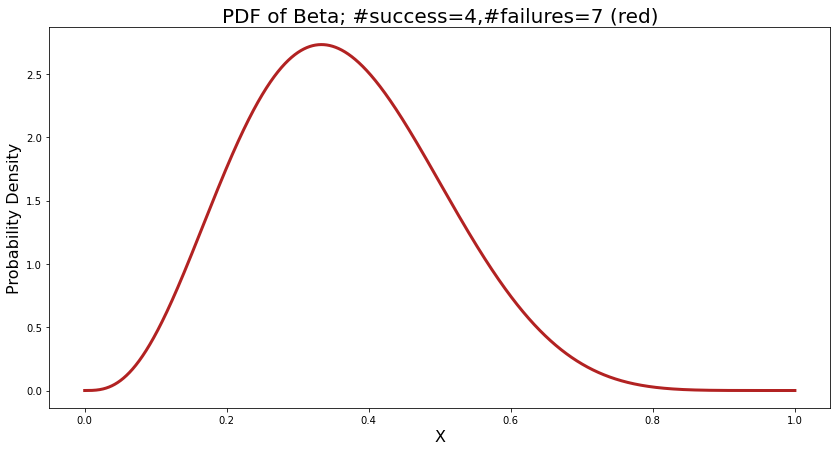

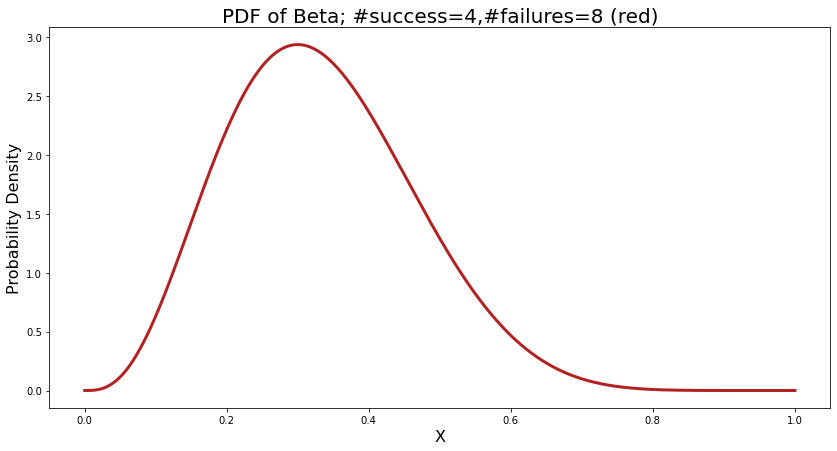

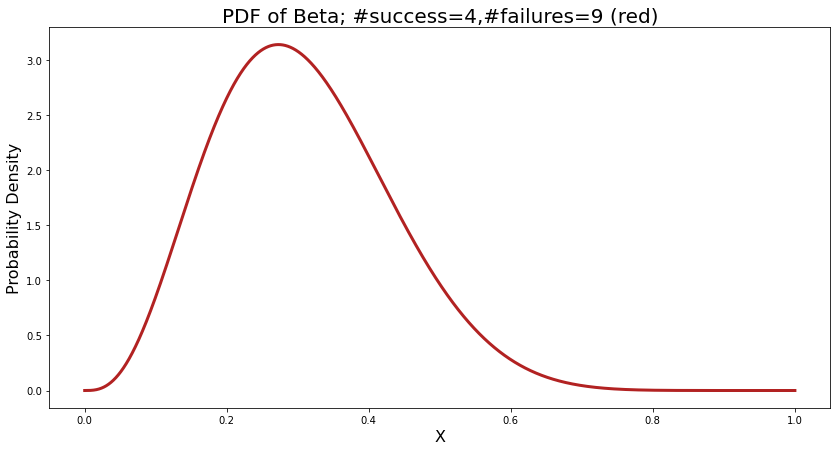

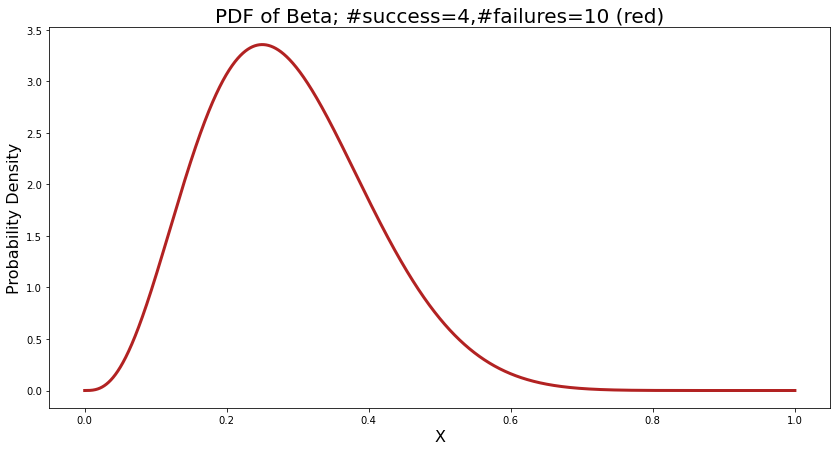

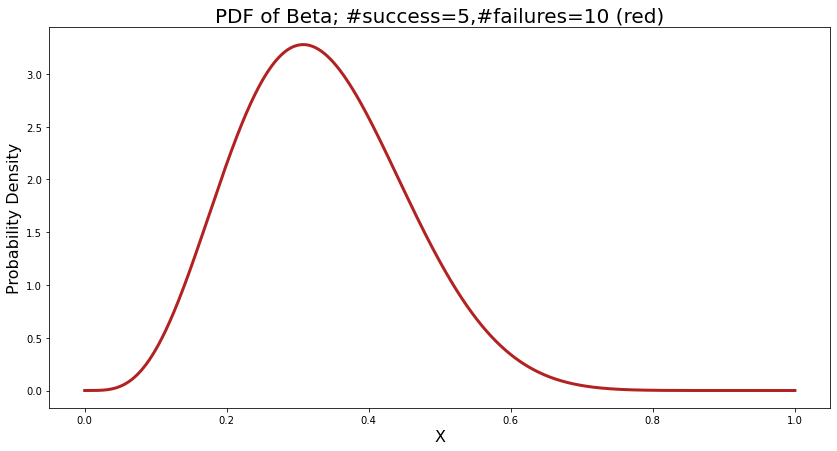

In [67]:
pretend = [0,0,1,0,0,1,0,0,1,1,0,0,0,0,1,0]

for ix in range(len(pretend)):
    pretend1=pretend[0:ix]
    
    num_s=sum(pretend1)
    num_f =len(pretend1)-num_s
    fig, ax = plt.subplots(figsize=(14,7))
    #plt.rcParams['figure.figsize'] = [10, 7]
    x = np.linspace(0, 1, 10000)
    y1 = beta.pdf(x, num_s, num_f)
    ax.set_title(f"PDF of Beta; #success={num_s},#failures={num_f} (red)", fontsize=20)
    ax.set_xlabel("X", fontsize=16)
    ax.set_ylabel("Probability Density", fontsize=16)
    ax.plot(x, y1, linewidth=3, color='firebrick')
    #fiddle with alpha and beta, relationship to eachother. 
    

In [27]:
#first thing I should do is grow a distribution keeping alpha and beta proportions the same. c
#change one paramter at a time. 

num_s

5

In [ ]:
for ix in range(1,100):
    a=b=ix 
    fig, ax = plt.subplots(figsize=(14,7))
    #plt.rcParams['figure.figsize'] = [10, 7]
    x = np.linspace(0, 1, 10000)
    y1 = beta(a, b)
    ax.set_title(f"PDF of Beta; #success={a-1},#failures={b-1} (red)", fontsize=20)
    ax.set_xlabel("X", fontsize=16)
    ax.set_ylabel("Probability Density", fontsize=16)
    ax.plot(x, y1.pdf(x), linewidth=3, color='firebrick')


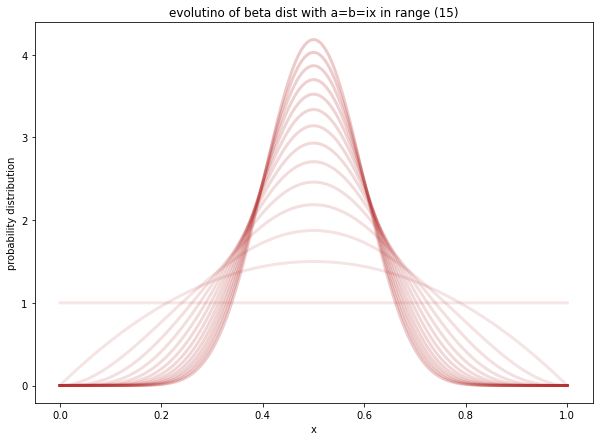

In [50]:
for ix in range(1,15):
    a=b=ix 
    #fig, ax = plt.subplots(figsize=(14,7))
    #plt.rcParams['figure.figsize'] = [10, 7]
    x = np.linspace(0, 1, 10000)
    y1 = beta(a, b)
#     ax.set_title(f"PDF of Beta; #success={a-1},#failures={b-1} (red)", fontsize=20)
#     ax.set_xlabel("X", fontsize=16)
#     ax.set_ylabel("Probability Density", fontsize=16)
    plt.plot(x, y1.pdf(x), linewidth=3, color='firebrick', alpha=(ix)/100+.1)
    plt.xlabel('x')
    plt.ylabel('probability distribution')
    plt.title('evolution of beta dist with a=b=ix in range (15)')


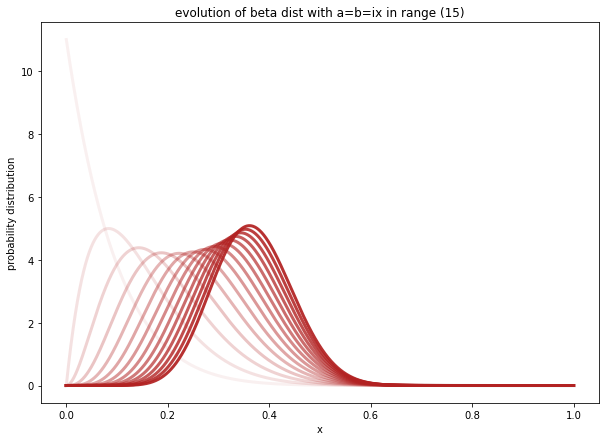

In [55]:
for ix in range(1,15):
    a=ix
    b=ix+10
    #fig, ax = plt.subplots(figsize=(14,7))
    #plt.rcParams['figure.figsize'] = [10, 7]
    x = np.linspace(0, 1, 10000)
    y1 = beta(a, b)
#     ax.set_title(f"PDF of Beta; #success={a-1},#failures={b-1} (red)", fontsize=20)
#     ax.set_xlabel("X", fontsize=16)
#     ax.set_ylabel("Probability Density", fontsize=16)
    plt.plot(x, y1.pdf(x), linewidth=3, color='firebrick', alpha=(ix)/15)
    plt.xlabel('x')
    plt.ylabel('probability distribution')
    plt.title('evolution of beta dist with a=b=ix in range (15)')


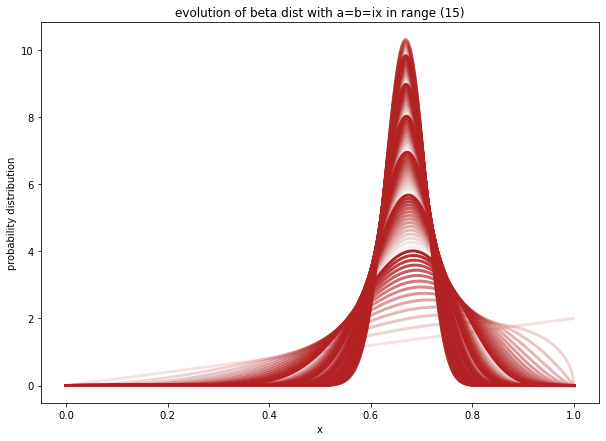

In [62]:
for ix in range(2,100):
    a=ix
    b=ix/2
    #fig, ax = plt.subplots(figsize=(14,7))
    #plt.rcParams['figure.figsize'] = [10, 7]
    x = np.linspace(0, 1, 10000)
    y1 = beta(a, b)
#     ax.set_title(f"PDF of Beta; #success={a-1},#failures={b-1} (red)", fontsize=20)
#     ax.set_xlabel("X", fontsize=16)
#     ax.set_ylabel("Probability Density", fontsize=16)
    plt.plot(x, y1.pdf(x), linewidth=3, color='firebrick', alpha=(ix)/15)
    plt.xlabel('x')
    plt.ylabel('probability distribution')
    plt.title('evolution of beta dist with a=b=ix in range (15)')


1

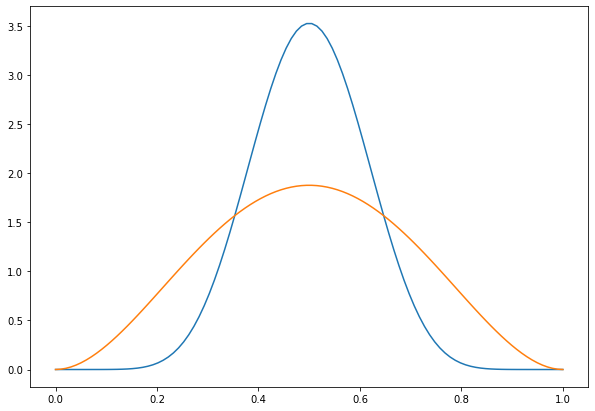

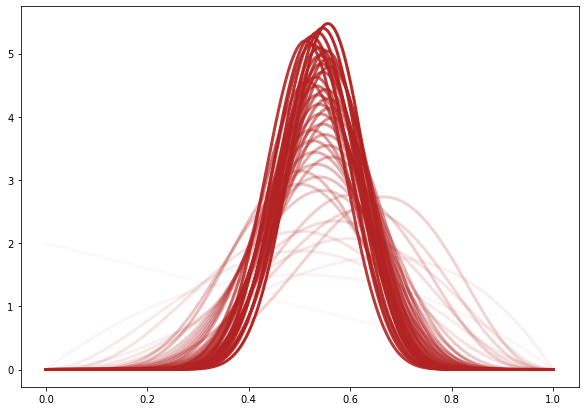

In [63]:
pretend = [0,1,1,0,1,0,1,1,1,0,0,0,1,0,1,1,0,1,0,1,0,1,1,0,1,0,1,0,1,0,0,1,1,1,0,1,0,1,0,0,0,1,1,1,1,0]
for ix in range(len(pretend)):
    pretend1=pretend[0:ix]
    num_s=sum(pretend1)
    num_f =len(pretend1)-num_s
#     fig, ax = plt.subplots(figsize=(14,7))
    #plt.rcParams['figure.figsize'] = [10, 7]
    x = np.linspace(0, 1, 10000)
    y1 = beta.pdf(x, num_s+1, num_f+1)
#     ax.set_title(f"PDF of Beta; #success={num_s},#failures={num_f} (red)", fontsize=20)
#     ax.set_xlabel("X", fontsize=16)
#     ax.set_ylabel("Probability Density", fontsize=16)
    plt.plot(x, y1, linewidth=3, color='firebrick',alpha=ix/len(pretend))
    #fiddle with alpha and beta, relationship to eachother. 

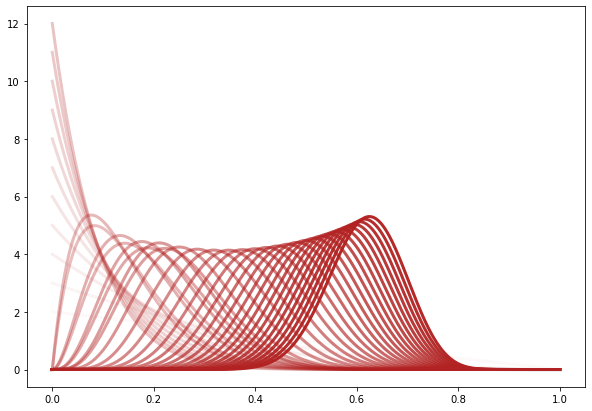

In [66]:
pretend = [0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
for ix in range(len(pretend)):
    pretend1=pretend[0:ix]
    num_s=sum(pretend1)
    num_f =len(pretend1)-num_s
#     fig, ax = plt.subplots(figsize=(14,7))
    #plt.rcParams['figure.figsize'] = [10, 7]
    x = np.linspace(0, 1, 10000)
    y1 = beta.pdf(x, num_s+1, num_f+1)
#     ax.set_title(f"PDF of Beta; #success={num_s},#failures={num_f} (red)", fontsize=20)
#     ax.set_xlabel("X", fontsize=16)
#     ax.set_ylabel("Probability Density", fontsize=16)
    plt.plot(x, y1, linewidth=3, color='firebrick',alpha=ix/len(pretend))
    #fiddle with alpha and beta, relationship to eachother. 